### Exploratory Data Analysis

We will start by loading the data and understanding how it is composed. We will look at the first few rows of the dataset, the distribution of variables. This will give us an idea of how the data is structured and what kind of preprocessing is needed.

In [155]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [156]:
# Loading in the data
data = pd.read_csv('orders.csv', encoding='latin1')

In [157]:
# Exploring the data
data.head()

,ROWID,ORDERID,ORDERDATE,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,...,PROVINCE,REGION,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE,DATASET
0,1,3,10/13/2020,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.8000,10/20/2020,Superstore
1,49,293,10/1/2022,High,49,10123.0200,0.07,Delivery Truck,398.2947,208.16,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.5046,10/2/2022,Superstore
2,50,293,10/1/2022,High,27,244.5700,0.01,Regular Air,40.6377,8.69,...,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-DÂ Ring Binder, Heavy Gauge Vinyl",Small Box,0.3393,10/3/2022,Superstore
3,80,483,7/10/2021,High,30,4965.7595,0.08,Regular Air,1270.9082,195.99,...,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.6148,7/12/2021,Superstore
4,85,515,8/28/2020,Not Specified,19,394.2700,0.08,Regular Air,26.9178,21.78,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.4350,8/30/2020,Superstore


In [158]:
# transforming the dates into datetime format
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['SHIPDATE'] = pd.to_datetime(data['SHIPDATE'])
data.head()

,ROWID,ORDERID,ORDERDATE,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,...,PROVINCE,REGION,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE,DATASET
0,1,3,2020-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.8000,2020-10-20,Superstore
1,49,293,2022-10-01,High,49,10123.0200,0.07,Delivery Truck,398.2947,208.16,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.5046,2022-10-02,Superstore
2,50,293,2022-10-01,High,27,244.5700,0.01,Regular Air,40.6377,8.69,...,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-DÂ Ring Binder, Heavy Gauge Vinyl",Small Box,0.3393,2022-10-03,Superstore
3,80,483,2021-07-10,High,30,4965.7595,0.08,Regular Air,1270.9082,195.99,...,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.6148,2021-07-12,Superstore
4,85,515,2020-08-28,Not Specified,19,394.2700,0.08,Regular Air,26.9178,21.78,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.4350,2020-08-30,Superstore


In [159]:
#Extract Time Features
data['ORDER_YEAR'] = data['ORDERDATE'].dt.year
data['ORDER_MONTH'] = data['ORDERDATE'].dt.month
data['SHIP_YEAR'] = data['SHIPDATE'].dt.year
data['SHIP_MONTH'] = data['SHIPDATE'].dt.month
data.head()

,ROWID,ORDERID,ORDERDATE,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,...,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE,DATASET,ORDER_YEAR,ORDER_MONTH,SHIP_YEAR,SHIP_MONTH
0,1,3,2020-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.8000,2020-10-20,Superstore,2020,10,2020,10
1,49,293,2022-10-01,High,49,10123.0200,0.07,Delivery Truck,398.2947,208.16,...,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.5046,2022-10-02,Superstore,2022,10,2022,10
2,50,293,2022-10-01,High,27,244.5700,0.01,Regular Air,40.6377,8.69,...,Binders and Binder Accessories,"Cardinal Slant-DÂ Ring Binder, Heavy Gauge Vinyl",Small Box,0.3393,2022-10-03,Superstore,2022,10,2022,10
3,80,483,2021-07-10,High,30,4965.7595,0.08,Regular Air,1270.9082,195.99,...,Telephones and Communication,R380,Small Box,0.6148,2021-07-12,Superstore,2021,7,2021,7
4,85,515,2020-08-28,Not Specified,19,394.2700,0.08,Regular Air,26.9178,21.78,...,Appliances,Holmes HEPA Air Purifier,Medium Box,0.4350,2020-08-30,Superstore,2020,8,2020,8


In [160]:
#Checking general information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ROWID               8399 non-null   int64         
 1   ORDERID             8399 non-null   int64         
 2   ORDERDATE           8399 non-null   datetime64[ns]
 3   ORDERPRIOTORITY     8399 non-null   object        
 4   ORDERQUANTITY       8399 non-null   int64         
 5   SALES               8399 non-null   float64       
 6   DISCOUNT            8399 non-null   float64       
 7   SHIPMODE            8399 non-null   object        
 8   PROFIT              8399 non-null   float64       
 9   UNITPRICE           8399 non-null   float64       
 10  SHIPPINGCOSTS       8399 non-null   float64       
 11  CUSTOMERNAME        8399 non-null   object        
 12  PROVINCE            8399 non-null   object        
 13  REGION              8399 non-null   object      

In [161]:
# Checking data types of the columns
print(data.dtypes)

ROWID                          int64
ORDERID                        int64
ORDERDATE             datetime64[ns]
ORDERPRIOTORITY               object
ORDERQUANTITY                  int64
SALES                        float64
DISCOUNT                     float64
SHIPMODE                      object
PROFIT                       float64
UNITPRICE                    float64
SHIPPINGCOSTS                float64
CUSTOMERNAME                  object
PROVINCE                      object
REGION                        object
CUSTOMERSEGMENT               object
PRODUCTCATEGORY               object
PRODUCTSUBCATEGORY            object
PRODUCTNAME                   object
PRODUCTCONTAINER              object
PRODUCTBASEMARGIN            float64
SHIPDATE              datetime64[ns]
DATASET                       object
ORDER_YEAR                     int32
ORDER_MONTH                    int32
SHIP_YEAR                      int32
SHIP_MONTH                     int32
dtype: object


In [162]:
# Check for missing values
data.isnull().sum()

ROWID                  0
ORDERID                0
ORDERDATE              0
ORDERPRIOTORITY        0
ORDERQUANTITY          0
SALES                  0
DISCOUNT               0
SHIPMODE               0
PROFIT                 0
UNITPRICE              0
SHIPPINGCOSTS          0
CUSTOMERNAME           0
PROVINCE               0
REGION                 0
CUSTOMERSEGMENT        0
PRODUCTCATEGORY        0
PRODUCTSUBCATEGORY     0
PRODUCTNAME            0
PRODUCTCONTAINER       0
PRODUCTBASEMARGIN     63
SHIPDATE               0
DATASET                0
ORDER_YEAR             0
ORDER_MONTH            0
SHIP_YEAR              0
SHIP_MONTH             0
dtype: int64

In [163]:
# Distribution of instances for all categorical variables
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    print(f"Distribution for {column}:")
    print(data[column].value_counts())
    print("\n")

Distribution for ORDERPRIOTORITY:
ORDERPRIOTORITY
High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: count, dtype: int64


Distribution for SHIPMODE:
SHIPMODE
Regular Air       6270
Delivery Truck    1146
Express Air        983
Name: count, dtype: int64


Distribution for CUSTOMERNAME:
CUSTOMERNAME
Darren Budd          41
Ed Braxton           38
Brad Thomas          35
Carlos Soltero       33
Patrick Jones        30
                     ..
Natalie DeCherney     1
Dorothy Dickinson     1
Craig Carreira        1
Maria Etezadi         1
Sample Company A      1
Name: count, Length: 795, dtype: int64


Distribution for PROVINCE:
PROVINCE
Ontario                  1826
British Columbia         1126
Saskachewan               913
Alberta                   865
Manitoba                  793
Quebec                    781
Yukon                     542
Nova Scotia               464
Northwest Territories     394
New Brunswick           

In [164]:
# Checking numerical columns excluding date columns and specific columns
date_columns = data.select_dtypes(include=['datetime64']).columns
exclude_columns = ['ORDERID', 'ROWID']
numerical_columns = data.select_dtypes(include=['number']).columns.difference(date_columns).difference(exclude_columns)

data[numerical_columns].describe()

,DISCOUNT,ORDERQUANTITY,ORDER_MONTH,ORDER_YEAR,PRODUCTBASEMARGIN,PROFIT,SALES,SHIPPINGCOSTS,SHIP_MONTH,SHIP_YEAR,UNITPRICE
count,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,0.049671,25.571735,6.521967,2020.482557,0.506977,179.874667,1775.878179,12.838557,6.528992,2020.487558,89.346259
std,0.031823,14.481071,3.445173,1.123860,0.138978,1180.977357,3585.050525,17.264052,3.446642,1.123715,290.354383
min,0.000000,1.000000,1.000000,2019.000000,0.304500,-12573.147600,2.240000,0.490000,1.000000,2019.000000,0.990000
25%,0.020000,13.000000,4.000000,2019.000000,0.381600,-81.379750,143.195000,3.300000,4.000000,2019.000000,6.480000
50%,0.050000,26.000000,7.000000,2020.000000,0.495900,-1.420000,449.420000,6.070000,7.000000,2020.000000,20.990000
75%,0.080000,38.000000,9.000000,2022.000000,0.600300,161.194200,1709.320000,13.990000,10.000000,2022.000000,85.990000
max,0.250000,50.000000,12.000000,2022.000000,0.901000,23682.000300,89061.050000,164.730000,12.000000,2022.000000,6783.020000


In [165]:
#Save the dataframe in new file
data.to_csv('orders_cleaned.csv', index=False)

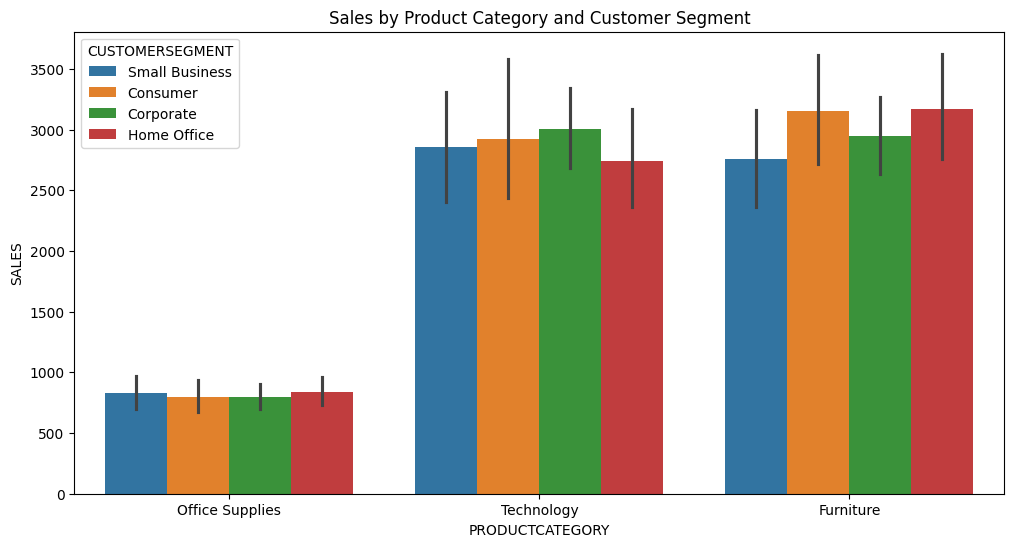

In [166]:
#Sales Distribution in Customer Segments
plt.figure(figsize=(12, 6))
sns.barplot(x='PRODUCTCATEGORY', y='SALES', hue='CUSTOMERSEGMENT', data=data)
plt.title('Sales by Product Category and Customer Segment')
plt.show()


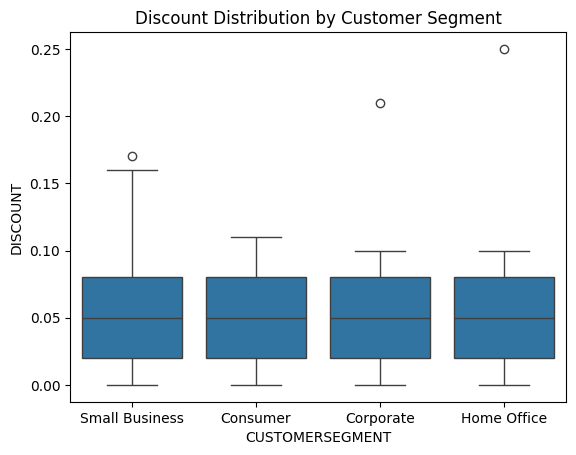

In [167]:
#Discount Distribution by Customer Segment
sns.boxplot(x='CUSTOMERSEGMENT', y='DISCOUNT', data=data)
plt.title('Discount Distribution by Customer Segment')
plt.show()


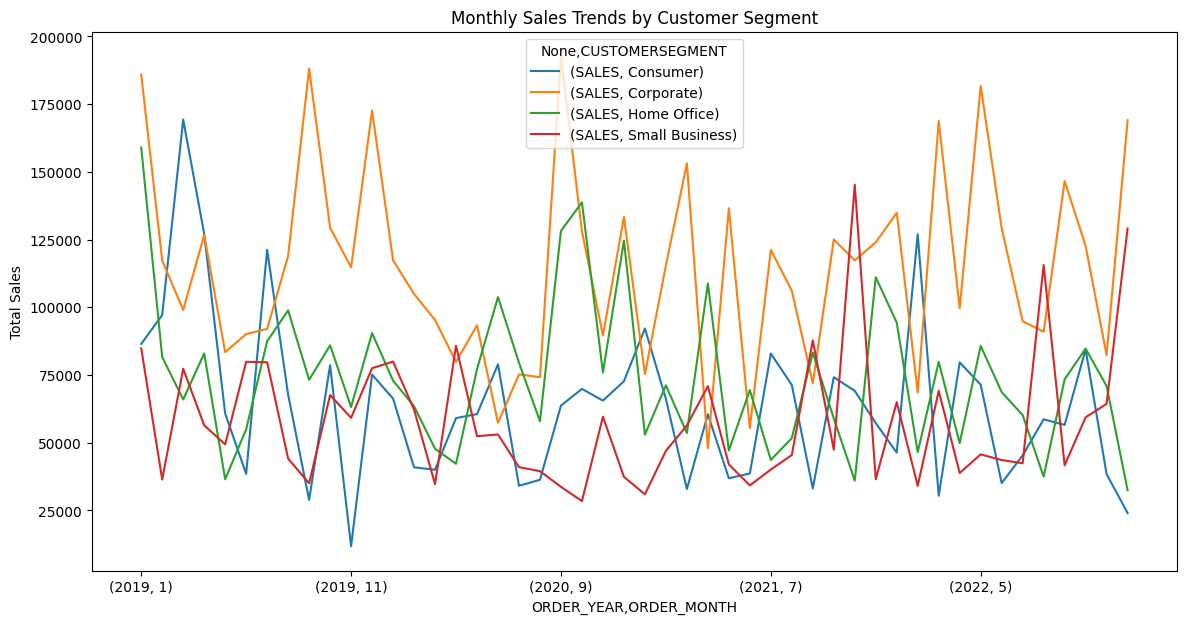

In [168]:
#Monthly Sales Trends by Customer Segment
monthly_sales = data.groupby(['ORDER_YEAR', 'ORDER_MONTH', 'CUSTOMERSEGMENT']).agg({'SALES': 'sum'}).unstack()
monthly_sales.plot(kind='line', figsize=(14, 7))
plt.title('Monthly Sales Trends by Customer Segment')
plt.ylabel('Total Sales')
plt.show()


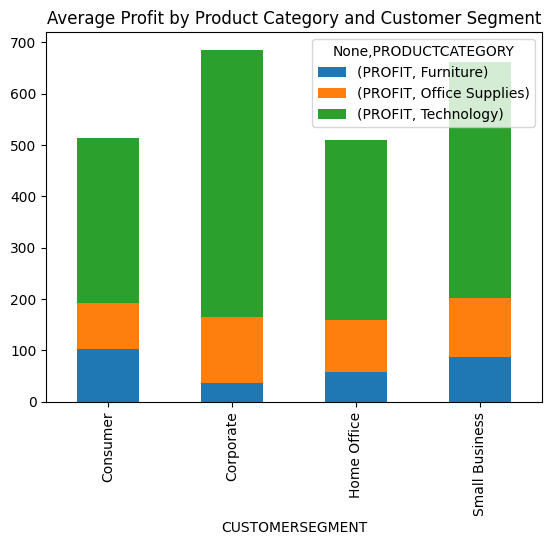

In [169]:
segment_profit = data.groupby(['CUSTOMERSEGMENT', 'PRODUCTCATEGORY']).agg({'PROFIT': 'mean'}).sort_values(by='PROFIT', ascending=False)
segment_profit.unstack().plot(kind='bar', stacked=True)
plt.title('Average Profit by Product Category and Customer Segment')
plt.show()


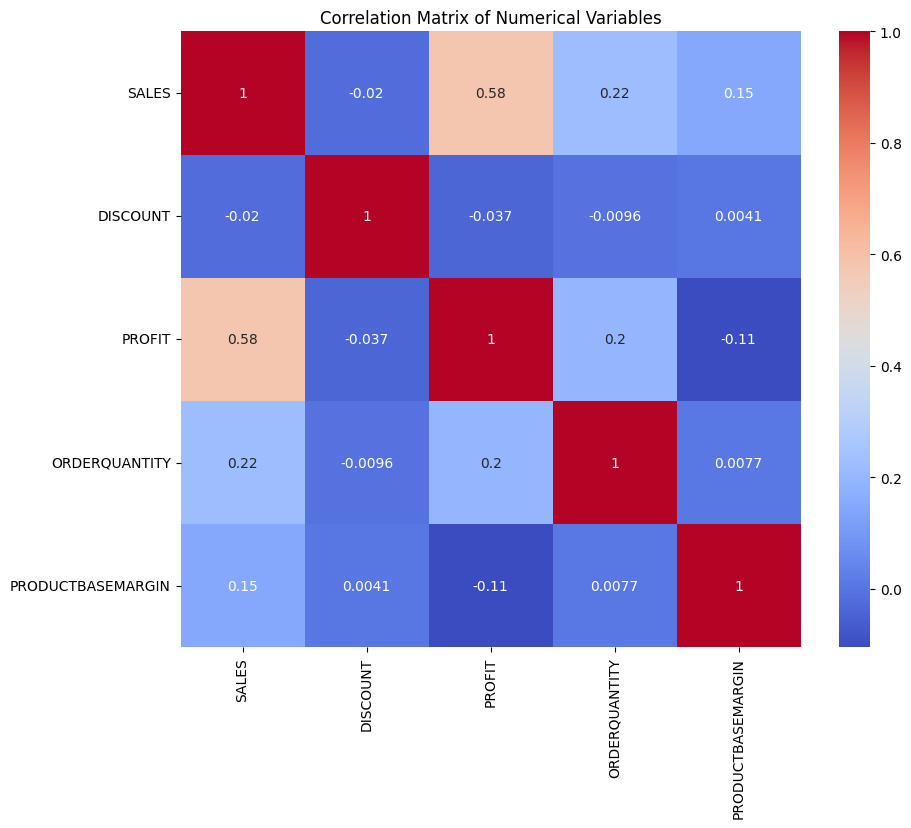

In [170]:
#Correlation Matrix of Numerical Variables
numerical_data = data[['SALES', 'DISCOUNT', 'PROFIT', 'ORDERQUANTITY', 'PRODUCTBASEMARGIN']]
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


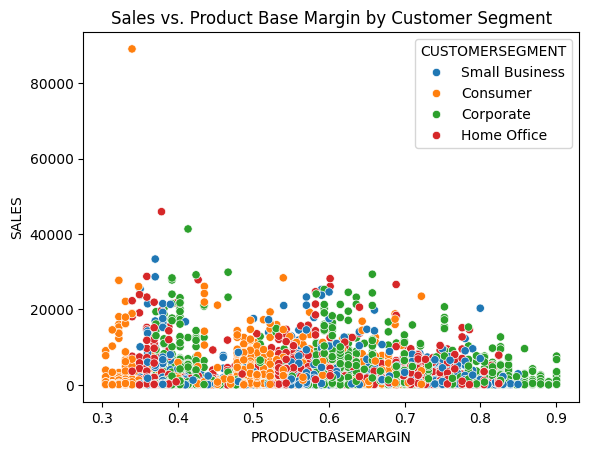

In [171]:
#Sales vs. Product Base Margin by Customer Segment
sns.scatterplot(x='PRODUCTBASEMARGIN', y='SALES', hue='CUSTOMERSEGMENT', data=data)
plt.title('Sales vs. Product Base Margin by Customer Segment')
plt.show()


In [172]:
# Filter data for the year 2022 and customer segment 'Consumer'
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
data_2022_consumer = data[(data['ORDERDATE'].dt.year == 2022) & (data['CUSTOMERSEGMENT'] == 'Consumer')]

# Define the weighted average function
def weighted_average(df, value_column, weight_column):
    return (df[value_column] * df[weight_column]).sum() / df[weight_column].sum()

# Group by product subcategory and calculate weighted average base margin for 2022 for 'Consumer' segment
weighted_avg_base_margin_2022_consumer = data_2022_consumer.groupby('PRODUCTSUBCATEGORY').apply(
    weighted_average, value_column='PRODUCTBASEMARGIN', weight_column='SALES'
)

# Display the result
print(weighted_avg_base_margin_2022_consumer)


PRODUCTSUBCATEGORY
Appliances                        0.500499
Binders and Binder Accessories    0.321923
Bookcases                         0.570278
Chairs & Chairmats                0.501201
Computer Peripherals              0.519279
Copiers and Fax                   0.392917
Envelopes                         0.332449
Labels                            0.326389
Office Furnishings                0.496097
Office Machines                   0.352490
Paper                             0.326439
Pens & Art Supplies               0.469636
Rubber Bands                      0.333324
Scissors, Rulers and Trimmers     0.709990
Storage & Organization            0.552049
Tables                            0.560778
Telephones and Communication      0.498767
dtype: float64
